In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load results
df = pd.read_csv('data/qic_noise_resilience_results.csv')
df.head()


,N_QUBITS,P_1Q_ERROR,P_2Q_ERROR,SEQ_LEN,INIT_STATE,FIDELITY,CIRCUIT_DEPTH,TOTAL_OPS
0,2,0.0001,0.001,1,10,1.0,12,17
1,2,0.0001,0.001,3,10,1.0,22,31
2,2,0.0001,0.001,5,10,1.0,32,45
3,2,0.0001,0.001,7,10,1.0,42,59
4,2,0.0001,0.001,10,10,1.0,57,80


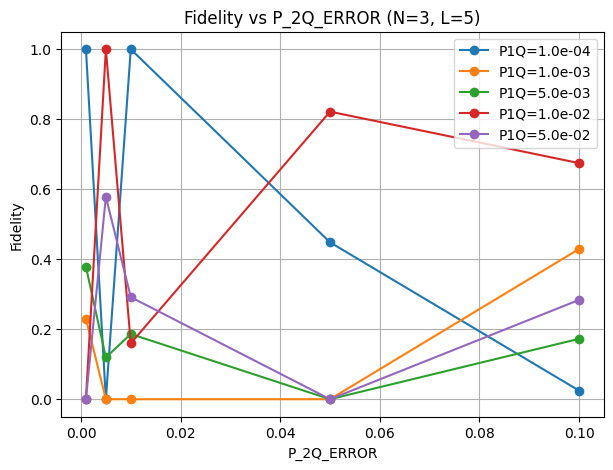

In [2]:
N_fixed = 3
L_fixed = 5
df1 = df[(df['N_QUBITS']==N_fixed) & (df['SEQ_LEN']==L_fixed)]

fig, ax = plt.subplots(figsize=(7,5))
for p1q in sorted(df1['P_1Q_ERROR'].unique()):
    subset = df1[df1['P_1Q_ERROR']==p1q]
    ax.plot(subset['P_2Q_ERROR'], subset['FIDELITY'], 'o-', label=f'P1Q={p1q:.1e}')
ax.set_xlabel('P_2Q_ERROR')
ax.set_ylabel('Fidelity')
ax.set_title(f'Fidelity vs P_2Q_ERROR (N={N_fixed}, L={L_fixed})')
ax.legend()
ax.grid(True)
plt.show()


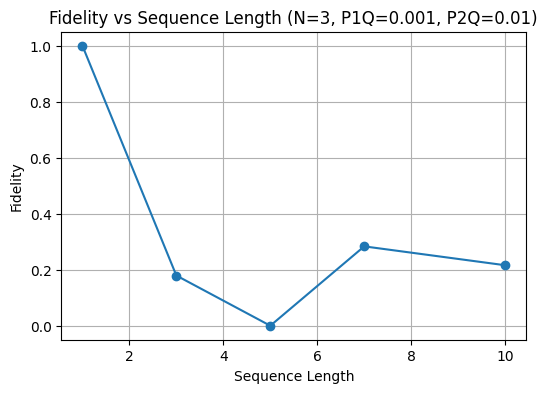

In [3]:
N_fixed = 3
P1Q_fixed = 1e-3
P2Q_fixed = 1e-2

df2 = df[(df['N_QUBITS']==N_fixed) &
         (df['P_1Q_ERROR']==P1Q_fixed) &
         (df['P_2Q_ERROR']==P2Q_fixed)]

plt.figure(figsize=(6,4))
plt.plot(df2['SEQ_LEN'], df2['FIDELITY'], 'o-')
plt.xlabel('Sequence Length')
plt.ylabel('Fidelity')
plt.title(f'Fidelity vs Sequence Length (N={N_fixed}, P1Q={P1Q_fixed}, P2Q={P2Q_fixed})')
plt.grid(True)
plt.show()


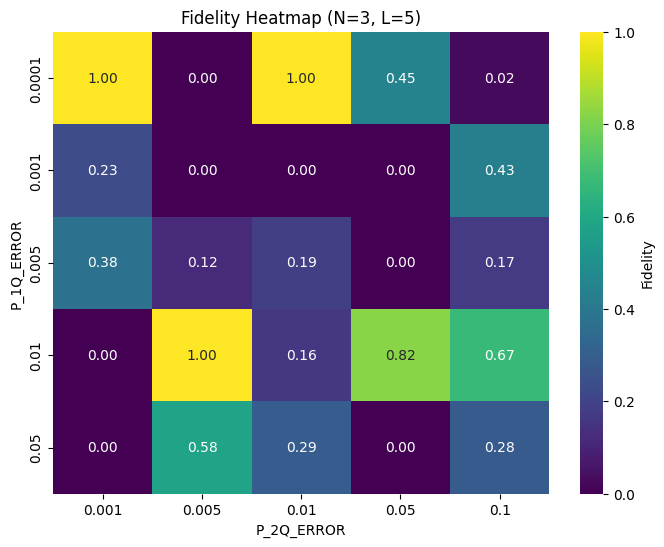

In [4]:
import seaborn as sns

L_fixed = 5
N_fixed = 3
df3 = df[(df['N_QUBITS']==N_fixed) & (df['SEQ_LEN']==L_fixed)]

pivot = df3.pivot(index='P_1Q_ERROR', columns='P_2Q_ERROR', values='FIDELITY')
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label':'Fidelity'})
plt.title(f'Fidelity Heatmap (N={N_fixed}, L={L_fixed})')
plt.ylabel('P_1Q_ERROR')
plt.xlabel('P_2Q_ERROR')
plt.show()

